## Import necessary libraries and functions

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import pickle

## Upload dataset and first looking

In [2]:
pd.set_option('display.max_columns', None)

data_raw = pd.read_csv("C:/Users/38097/Desktop/Quantum internship/internship_train.csv")
data_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

## Descriptive statistics

*So, the data don't have missing values, let's continue  a descriptive statistics*


In [49]:
data_raw.describe().transpose().sort_values(by="50%", ascending=False)

,count,mean,std,min,25%,50%,75%,max
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
12,90000.0,249.899900,144.310495,0.000000,125.000000,251.000000,375.000000,499.000000
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
10,90000.0,249.818967,144.363827,0.000000,126.000000,250.000000,375.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000
11,90000.0,249.346778,144.476128,0.000000,124.000000,249.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000


*Count unique values in each column*

In [8]:
for i in (data_raw.columns):
    n = len(pd.unique(data_raw[i]))
    print(f"No.of.unique values in Column{i}: {n}")

No.of.unique values in Column0: 500
No.of.unique values in Column1: 500
No.of.unique values in Column2: 500
No.of.unique values in Column3: 500
No.of.unique values in Column4: 500
No.of.unique values in Column5: 500
No.of.unique values in Column6: 199
No.of.unique values in Column7: 90000
No.of.unique values in Column8: 2
No.of.unique values in Column9: 500
No.of.unique values in Column10: 500
No.of.unique values in Column11: 500
No.of.unique values in Column12: 500
No.of.unique values in Column13: 90000
No.of.unique values in Column14: 90000
No.of.unique values in Column15: 90000
No.of.unique values in Column16: 90000
No.of.unique values in Column17: 90000
No.of.unique values in Column18: 90000
No.of.unique values in Column19: 90000
No.of.unique values in Column20: 90000
No.of.unique values in Column21: 90000
No.of.unique values in Column22: 90000
No.of.unique values in Column23: 90000
No.of.unique values in Column24: 90000
No.of.unique values in Column25: 90000
No.of.unique values in

*Let's plot boxplot and density distribution for each column*

C:\Users\38097\AppData\Local\Temp\ipykernel_9464\2243966884.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 576x360 with 0 Axes>

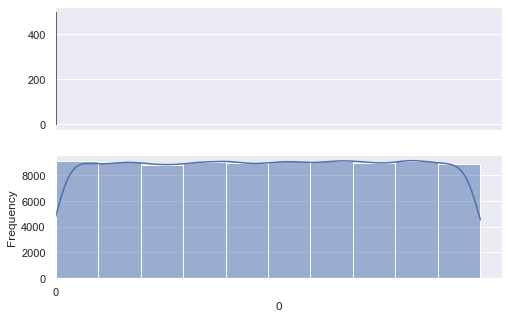

<Figure size 576x360 with 0 Axes>

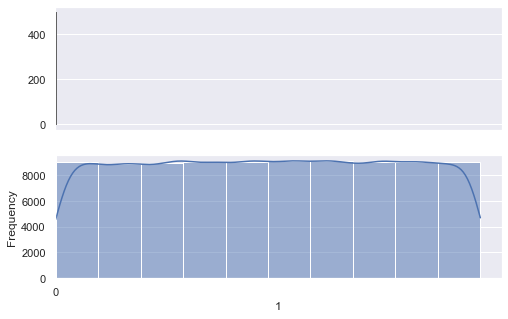

<Figure size 576x360 with 0 Axes>

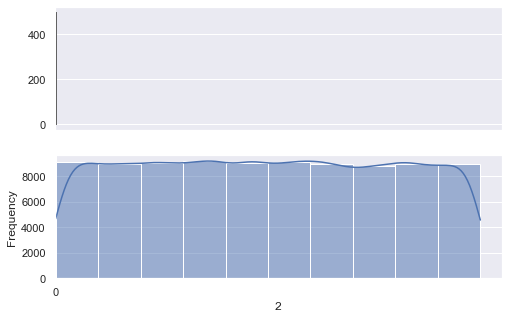

<Figure size 576x360 with 0 Axes>

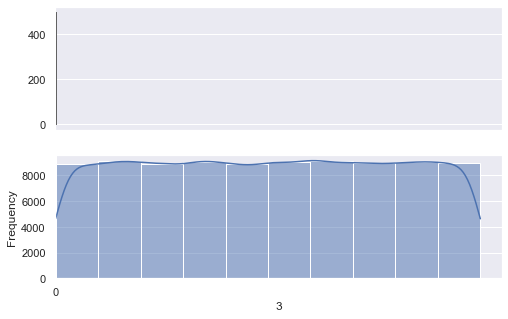

<Figure size 576x360 with 0 Axes>

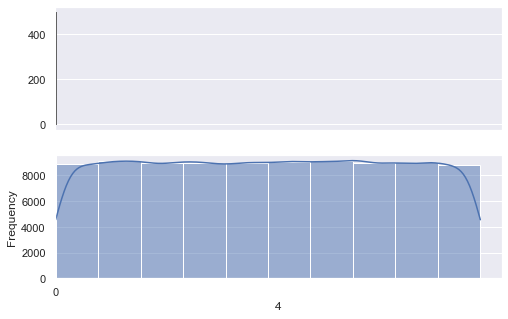

<Figure size 576x360 with 0 Axes>

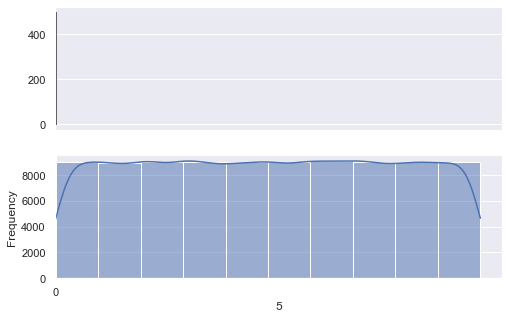

<Figure size 576x360 with 0 Axes>

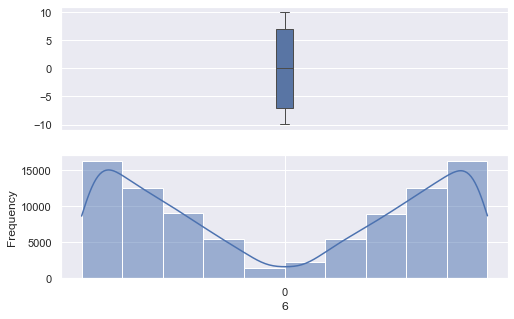

<Figure size 576x360 with 0 Axes>

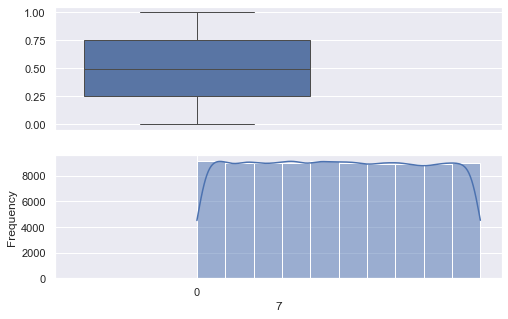

<Figure size 576x360 with 0 Axes>

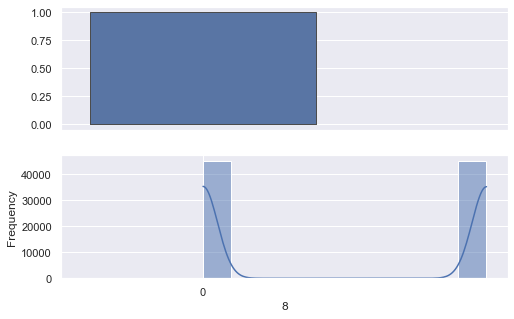

<Figure size 576x360 with 0 Axes>

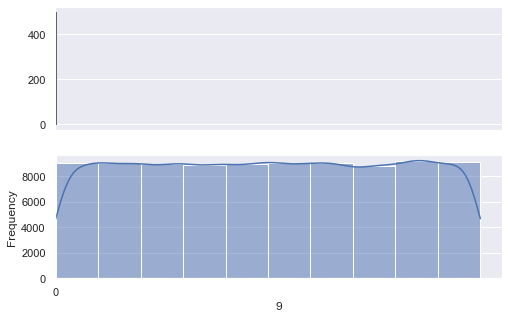

<Figure size 576x360 with 0 Axes>

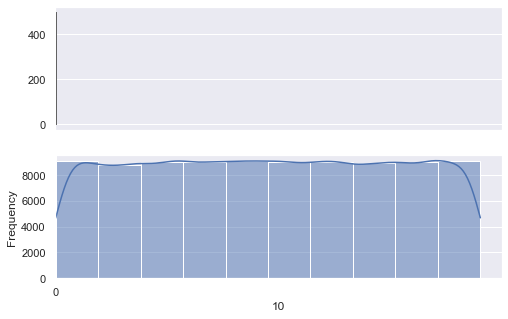

<Figure size 576x360 with 0 Axes>

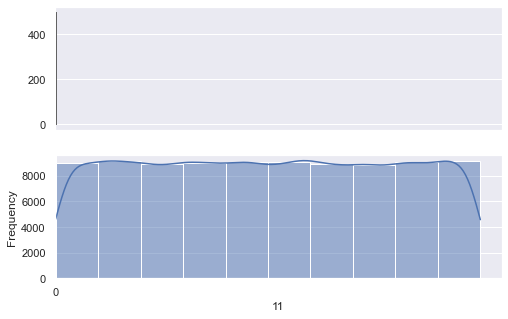

<Figure size 576x360 with 0 Axes>

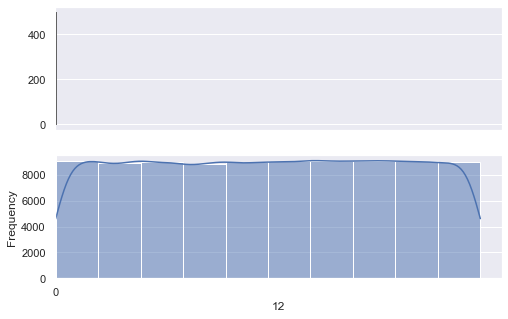

<Figure size 576x360 with 0 Axes>

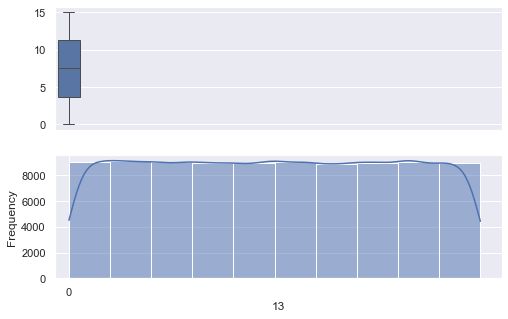

<Figure size 576x360 with 0 Axes>

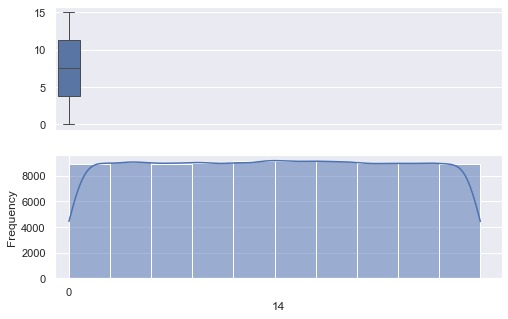

<Figure size 576x360 with 0 Axes>

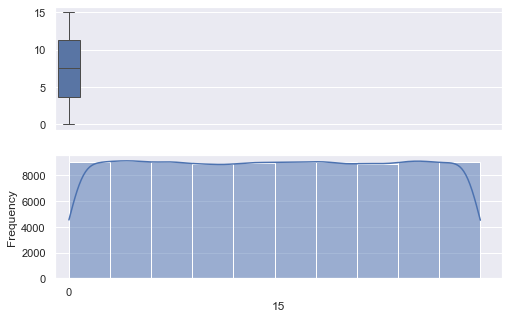

<Figure size 576x360 with 0 Axes>

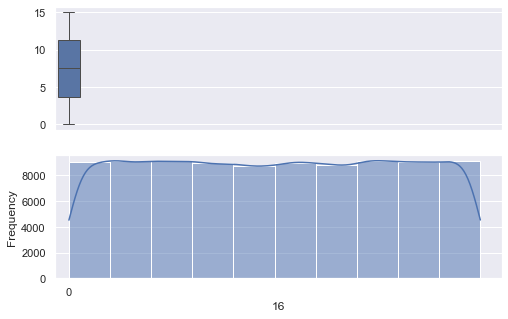

<Figure size 576x360 with 0 Axes>

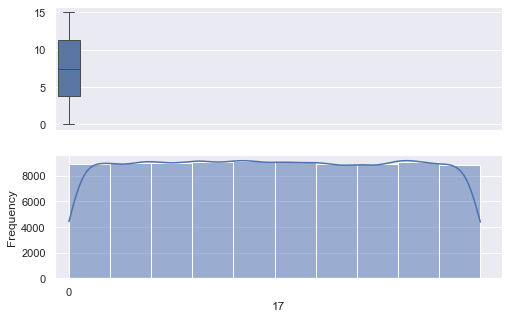

<Figure size 576x360 with 0 Axes>

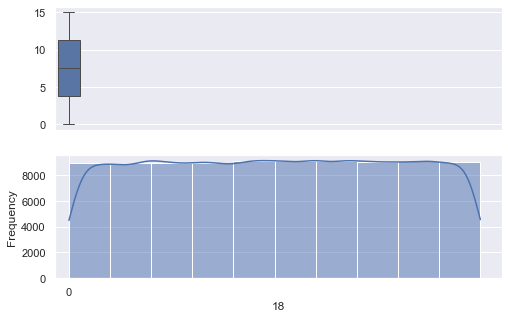

<Figure size 576x360 with 0 Axes>

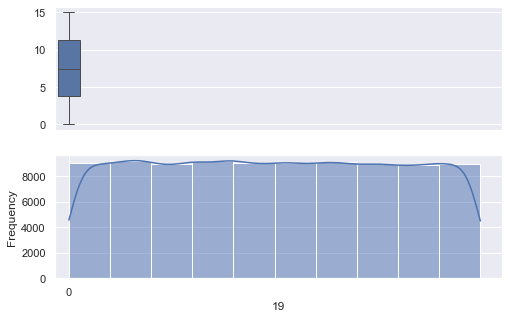

<Figure size 576x360 with 0 Axes>

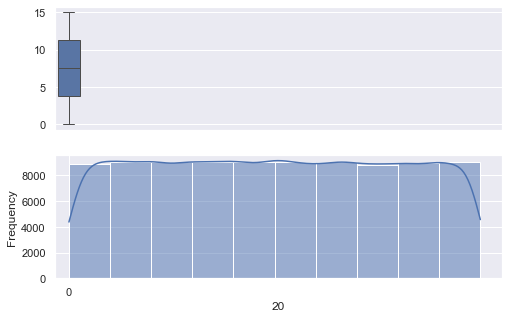

<Figure size 576x360 with 0 Axes>

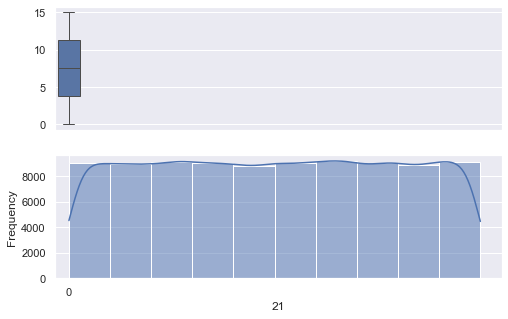

<Figure size 576x360 with 0 Axes>

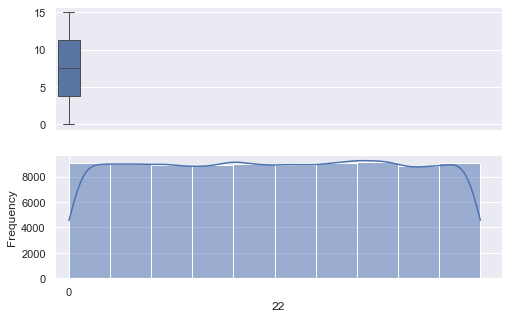

<Figure size 576x360 with 0 Axes>

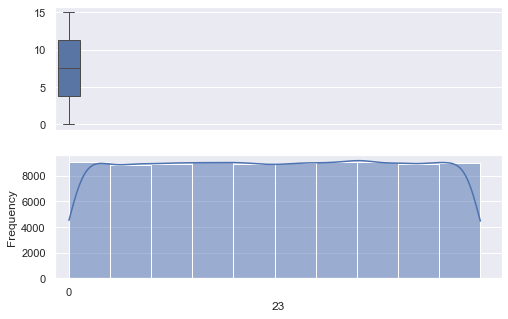

<Figure size 576x360 with 0 Axes>

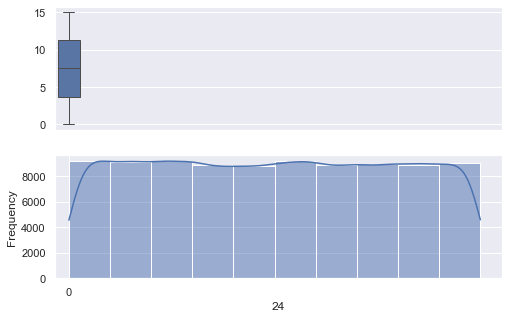

<Figure size 576x360 with 0 Axes>

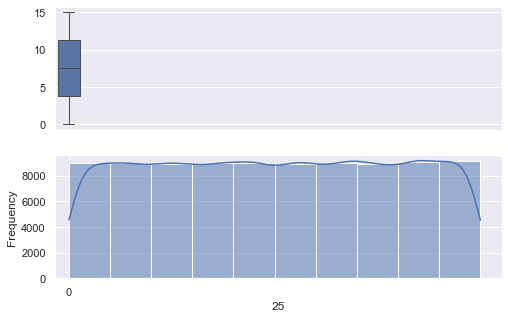

<Figure size 576x360 with 0 Axes>

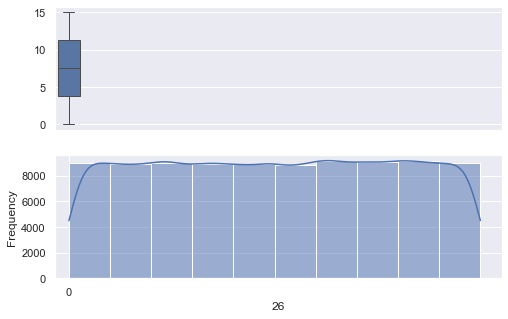

<Figure size 576x360 with 0 Axes>

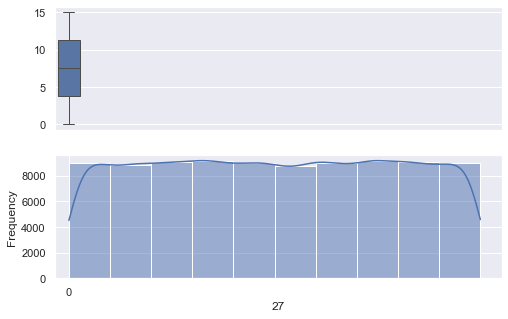

<Figure size 576x360 with 0 Axes>

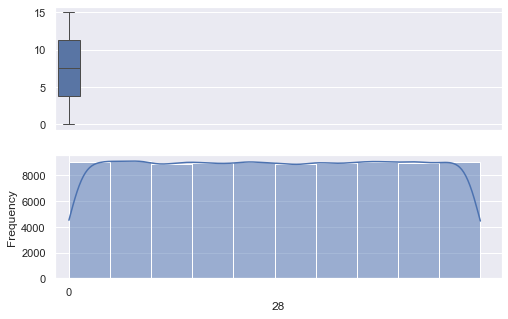

<Figure size 576x360 with 0 Axes>

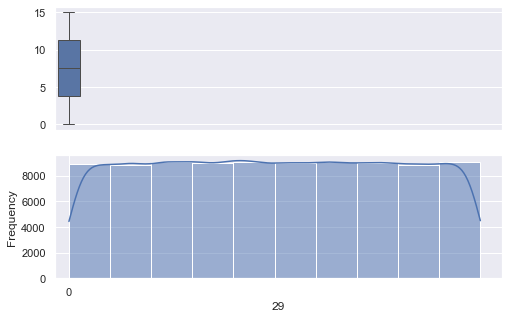

<Figure size 576x360 with 0 Axes>

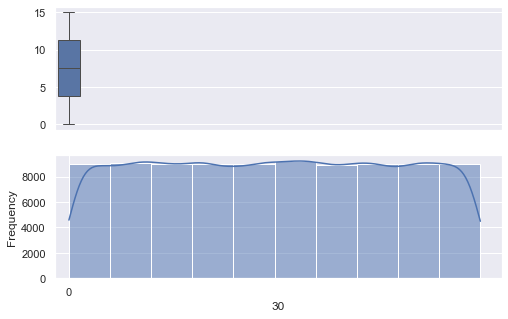

<Figure size 576x360 with 0 Axes>

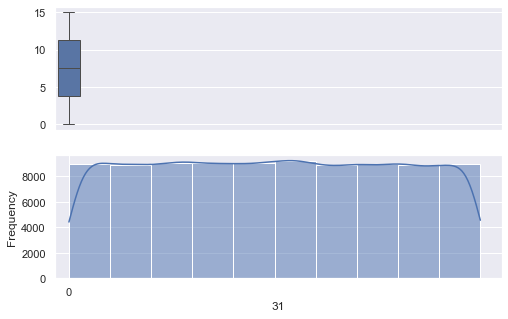

<Figure size 576x360 with 0 Axes>

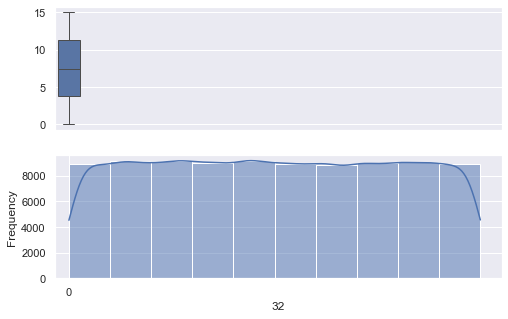

<Figure size 576x360 with 0 Axes>

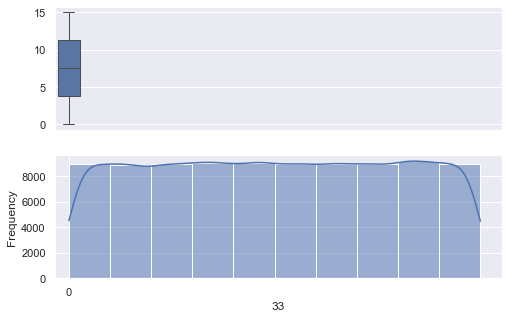

<Figure size 576x360 with 0 Axes>

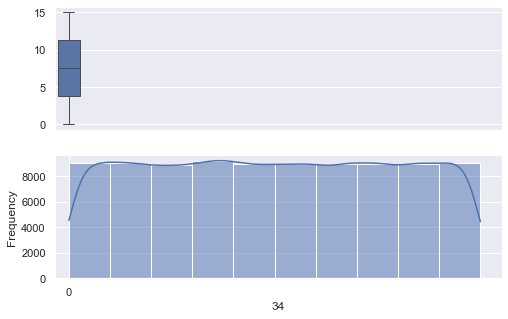

<Figure size 576x360 with 0 Axes>

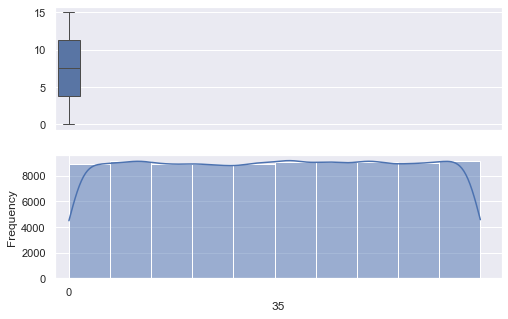

<Figure size 576x360 with 0 Axes>

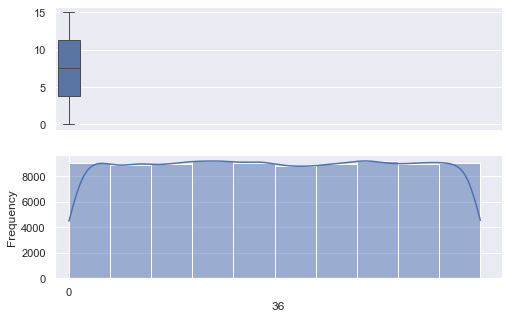

<Figure size 576x360 with 0 Axes>

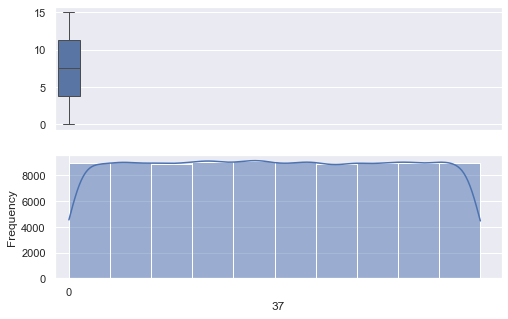

<Figure size 576x360 with 0 Axes>

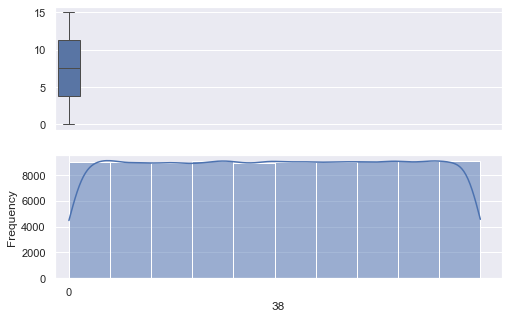

<Figure size 576x360 with 0 Axes>

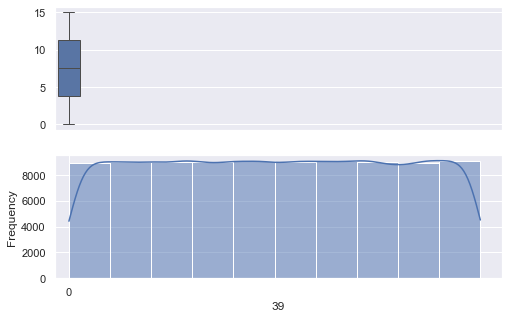

<Figure size 576x360 with 0 Axes>

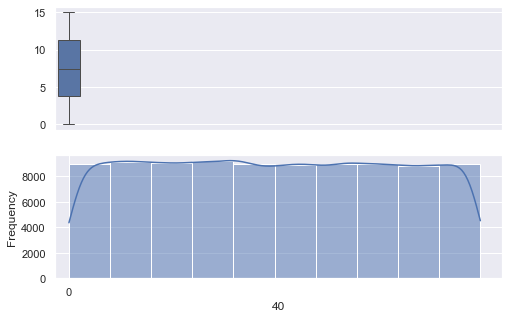

<Figure size 576x360 with 0 Axes>

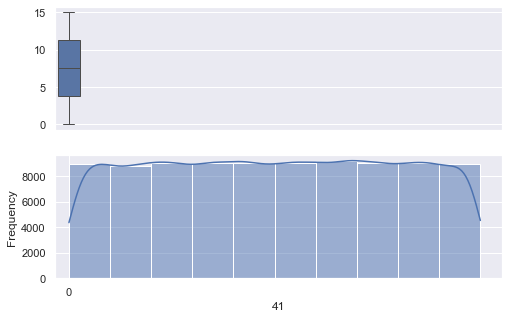

<Figure size 576x360 with 0 Axes>

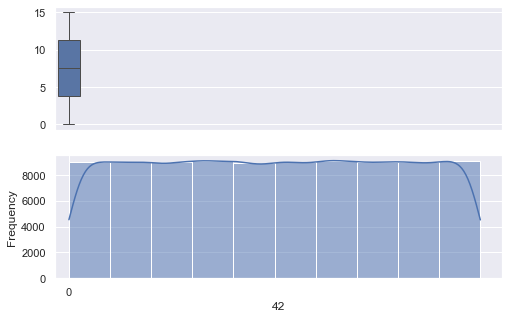

<Figure size 576x360 with 0 Axes>

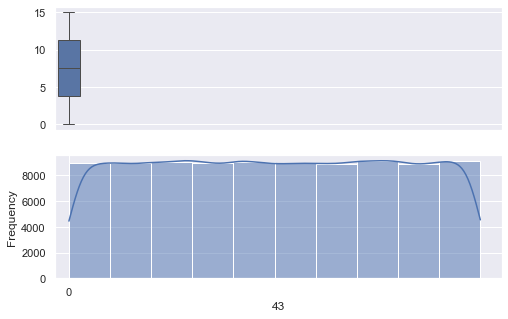

<Figure size 576x360 with 0 Axes>

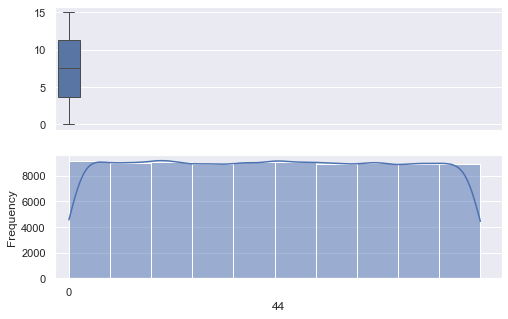

<Figure size 576x360 with 0 Axes>

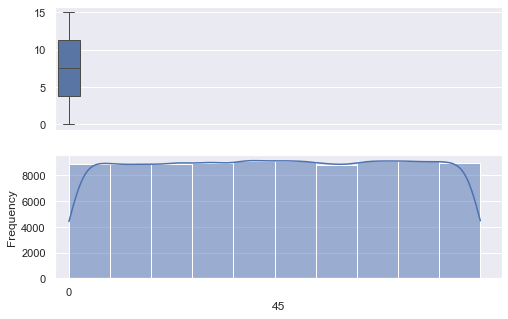

<Figure size 576x360 with 0 Axes>

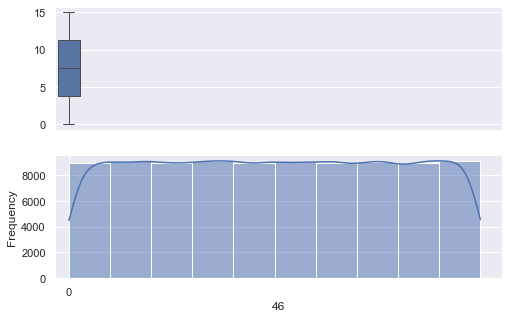

<Figure size 576x360 with 0 Axes>

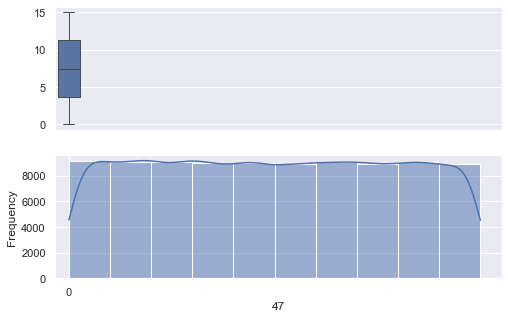

<Figure size 576x360 with 0 Axes>

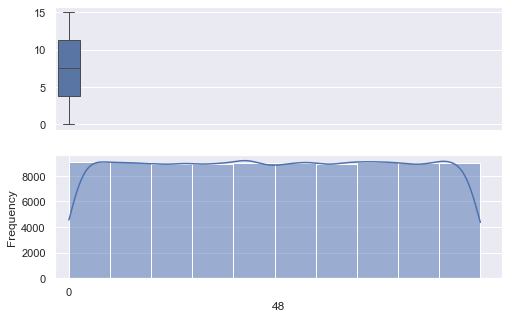

<Figure size 576x360 with 0 Axes>

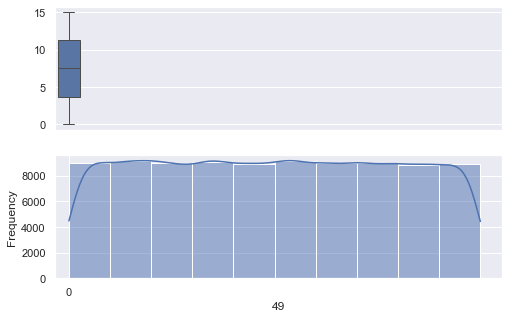

<Figure size 576x360 with 0 Axes>

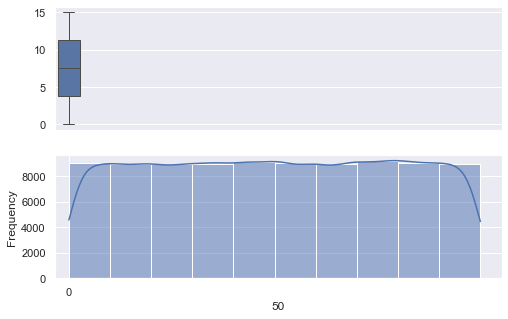

<Figure size 576x360 with 0 Axes>

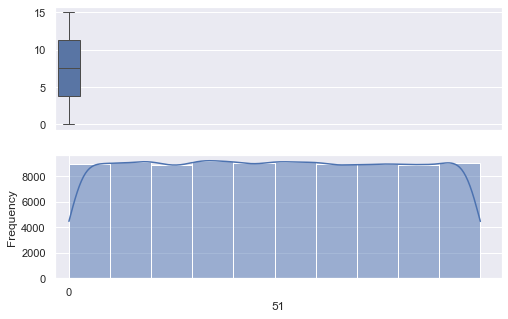

<Figure size 576x360 with 0 Axes>

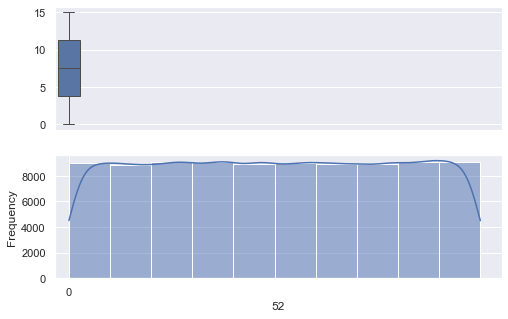

<Figure size 576x360 with 0 Axes>

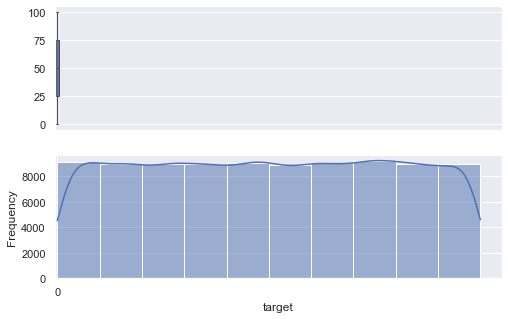

In [16]:
# a for loop to automate our task--------------
for i in data_raw.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(data_raw[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(data_raw[i], ax=ax_hist , bins = 10,kde=True)
    #plt.title(f'Column:{i}')

*Since most of the data is uniformly distributed, it's unnecessary to transform data. Let's check whether the data have a linear relationship with the target variable.*

In [24]:
corr_matrix=data_raw.corr()
corr_matrix["target"].sort_values(ascending=False)
cm = sns.light_palette("green", as_cmap=True)
corr_matrix.style.background_gradient(cmap=cm).set_precision(2)

C:\Users\38097\AppData\Local\Temp\ipykernel_9116\1267621822.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap=cm).set_precision(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,1.00,0.00,0.00,0.00,-0.00,-0.01,0.01,0.01,0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.01,0.00,0.00,-0.00,-0.01,-0.00,0.00,0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.01,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
1,0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,0.01,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.01,0.01,-0.00,-0.01,-0.00,-0.00,0.00,0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.01,-0.00,0.00,0.00,0.01,-0.00,-0.01
2,0.00,-0.00,1.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00,0.00,0.01,0.00,0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
3,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
4,-0.00,-0.00,0.00,-0.00,1.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,0.01,-0.00,0.00,-0.00,0.00,0.00,-0.01,0.00,0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.01,0.00,-0.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
5,-0.01,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.01,0.00,-0.01,0.01,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
6,0.01,0.00,0.00,0.00,0.01,-0.00,1.00,-0.00,0.94,-0.01,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.01,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.01,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
7,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.01,-0.01,0.01,0.00,-0.00,0.01,-0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,0.01,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.00,0.00,-0.00,-0.00,0.00,0.00,0.01,0.00,0.01
8,0.01,0.00,0.00,0.00,0.00,-0.00,0.94,0.00,1.00,-0.01,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.01,-0.00,0.00,0.00,0.01,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,-0.00,0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.01,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00


<AxesSubplot:xlabel='6', ylabel='8'>

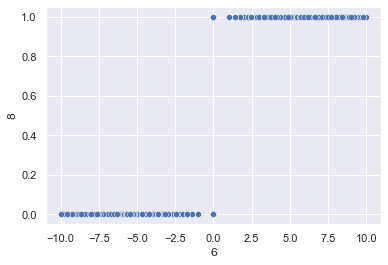

In [43]:
sns.scatterplot(x='6',y='8',data=data_raw)

## What I noticed in the data:
* Data don't have missing values and outliers.
* All data have numerical type of values(int64,float64). 
* Most features have a uniform distribution of values. It means that we don't have to use the additional transformation of data.
* In data are 52 numerical and one binary categorical feature.
* I noticed two blocks of data where data have a similar distribution. So, feateres [0,1,2,3,4,5,9,10,11,12](block 1) have similar distribution, where median equals ~250 and another block - features [13-52](block 2) where median equals ~7.5. The rest three columns [6,7,8,] differ from the others.
* Such typing is also almost confirmed by a number of unique values in those blocks of data. All columns from block 1 have 500 unique values, block 2 - 90000, and columns 6,7,8 - 199, 90000, and 2, respectively.
* From the result of the correlation I noticed that there is no direct linear dependence between the target and any of the features. But I noticed a large correlation between 6 and 8 features (0.94). 



## Results and Discussion after learning models


* Linear model with L1 regularization show the worst result in metric root mean square error(RMSE) 29.04. It wasn't surprising because from data analysis we saw absent linear dependence. Nevertheless, it's good to try it because the algorithm of Linear regression is less complex compared to other algorithms.

* Using Random Forest (ensemble bagging algorithm) I obtained RMSE = ~ 5.23. This is a good result as I managed to increase the metric almost by 6 times. 

* Using the AdaBoost (ensemble boosting algorithm)  I obtained RMSE = ~ 4.63. But it's important to point out that the AdaBoost model learned slower than Random Forest.
* For prediction I chose AdaBoost as it showed the better result of target metric and it's less tolerant to overfitting than Random Forest, despite the slower execution which is based on sequential ensembling.
